In [13]:
library(Seurat)
library(harmony)
library(ggplot2)
library(dplyr)

In [2]:
skin384.h5 <- "/data/downloads-cellranger7.1/skin384/per_sample_outs/Skin_384/count/sample_filtered_feature_bc_matrix.h5"

In [3]:
s384 <- Read10X_h5(skin384.h5)

In [5]:
s384.s <- CreateSeuratObject(counts = s384, project = "p2", min.cells = 3, min.features = 200)

In [6]:
s384.s

An object of class Seurat 
21092 features across 3724 samples within 1 assay 
Active assay: RNA (21092 features, 0 variable features)
 1 layer present: counts

In [7]:
s384.s[["percent.mt"]] <- PercentageFeatureSet(s384.s, pattern = "^MT-")

In [8]:
head(s384.s@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACCTGAGGCGTACA-1,p2,3842,1855,2.004164
AAACCTGCAACACCTA-1,p2,30381,4635,2.287614
AAACCTGTCCAGAAGG-1,p2,2817,1677,2.165424
AAACCTGTCTTGTACT-1,p2,2633,1235,3.873908
AAACGGGAGATGCCAG-1,p2,2886,1502,3.776854


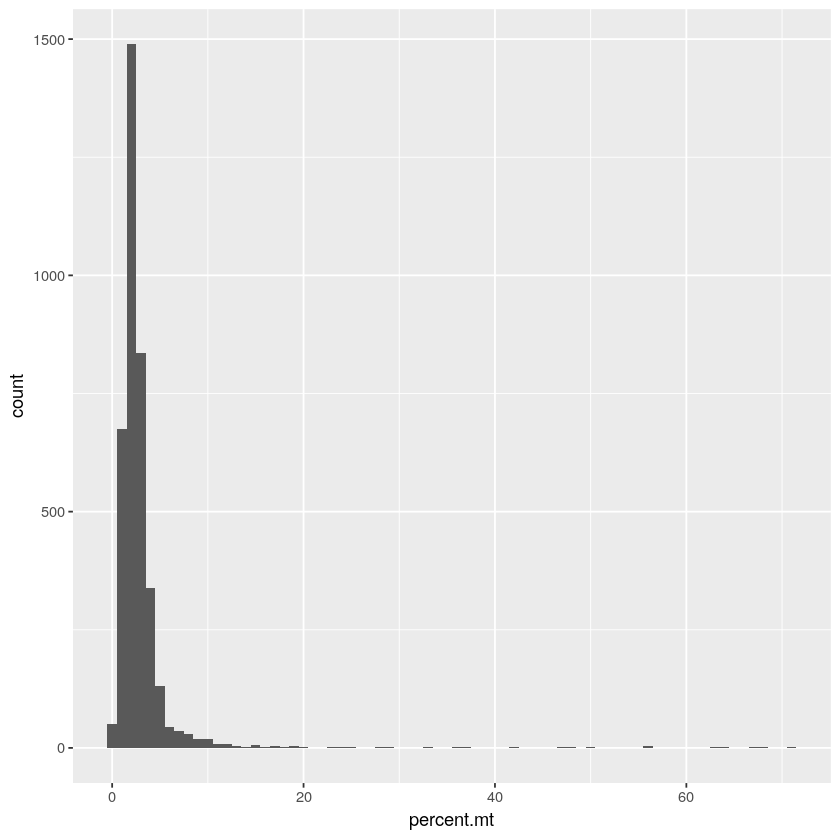

In [13]:
ggplot(s384.s@meta.data, aes(percent.mt)) + geom_histogram(binwidth=1)

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


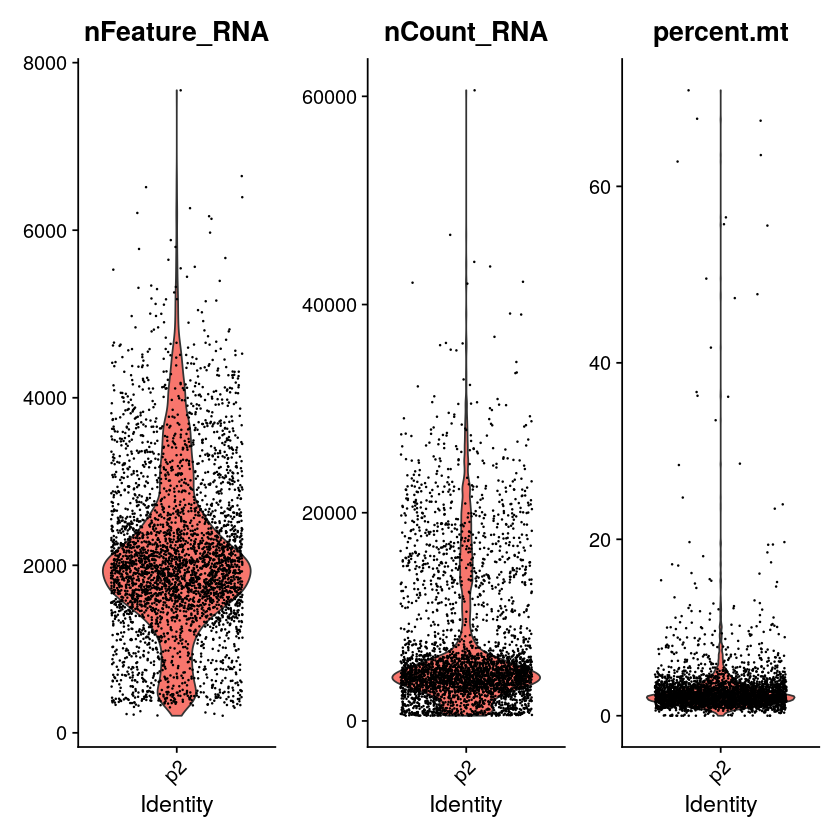

In [14]:
VlnPlot(s384.s, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

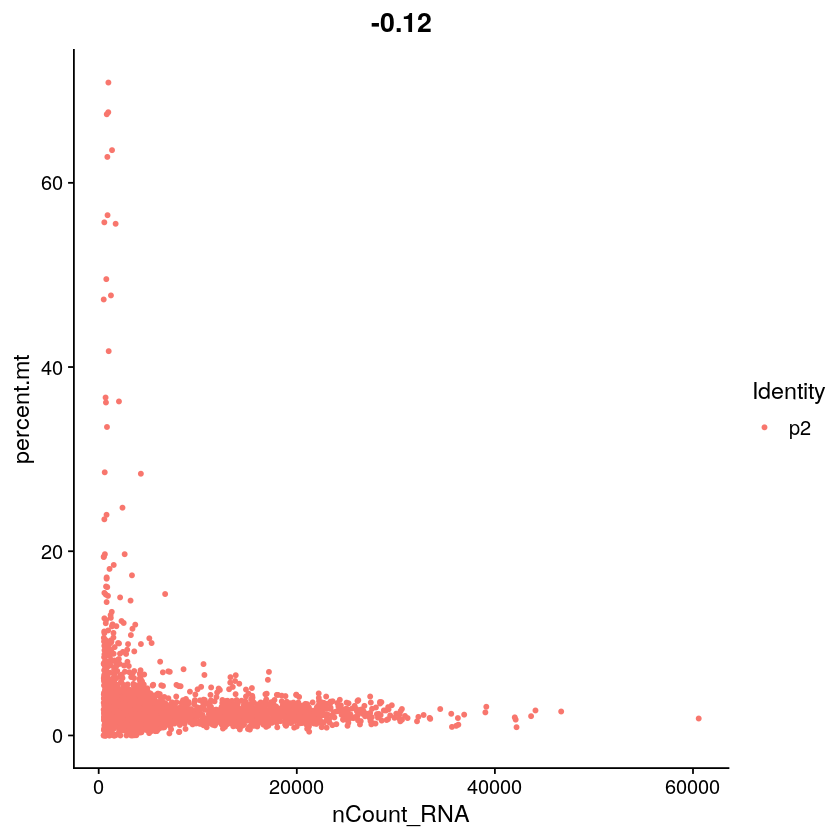

In [15]:
FeatureScatter(s384.s, feature1 = "nCount_RNA", feature2 = "percent.mt")

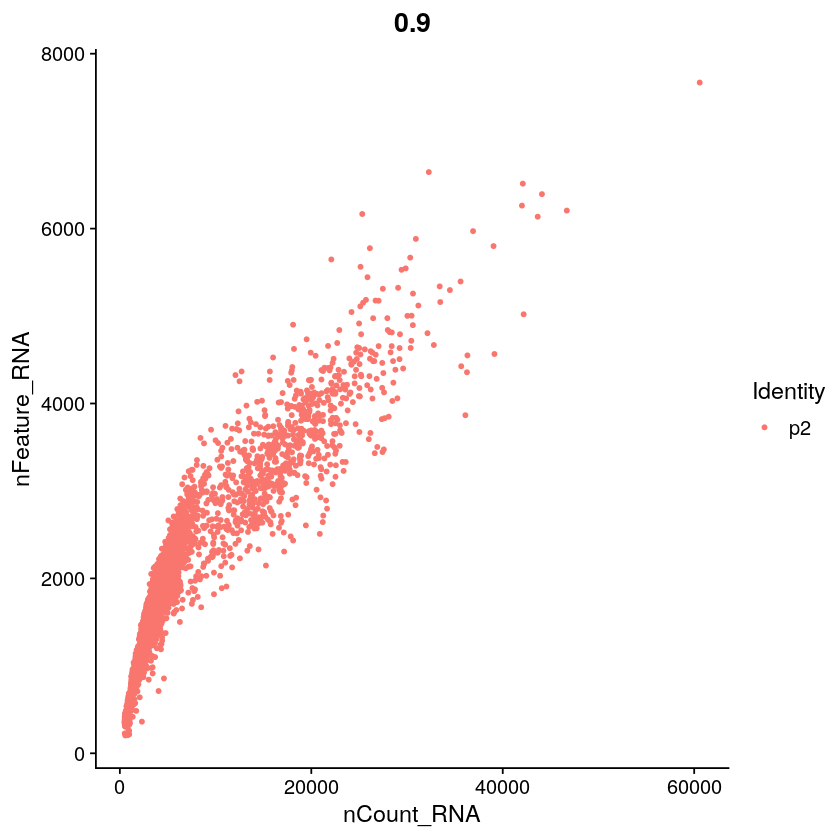

In [17]:
FeatureScatter(s384.s, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

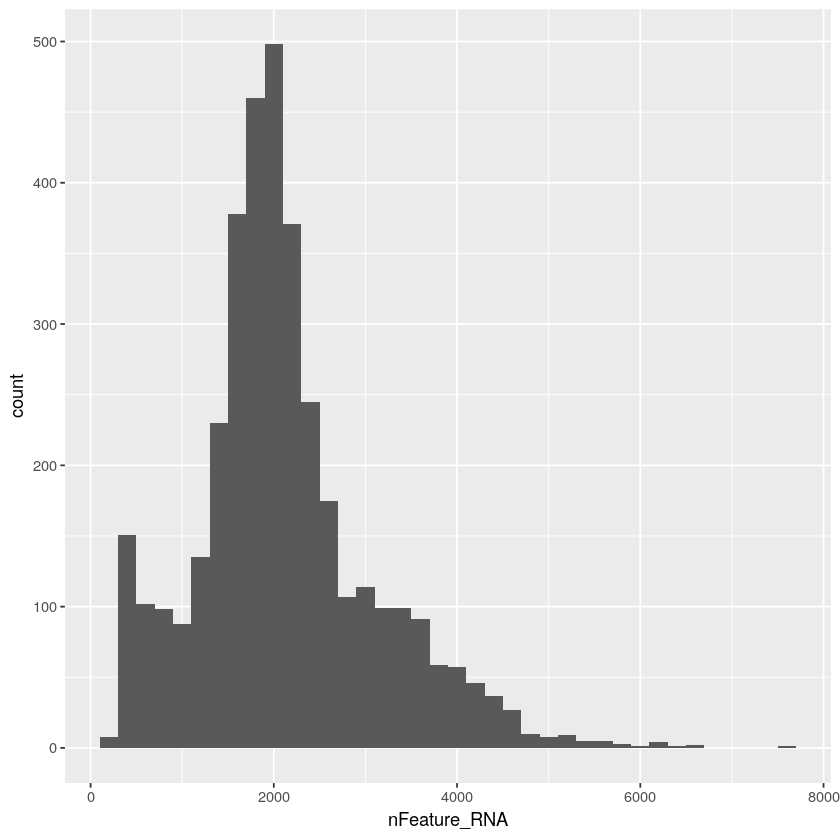

In [20]:
ggplot(s384.s@meta.data, aes(nFeature_RNA)) + geom_histogram(binwidth=200)

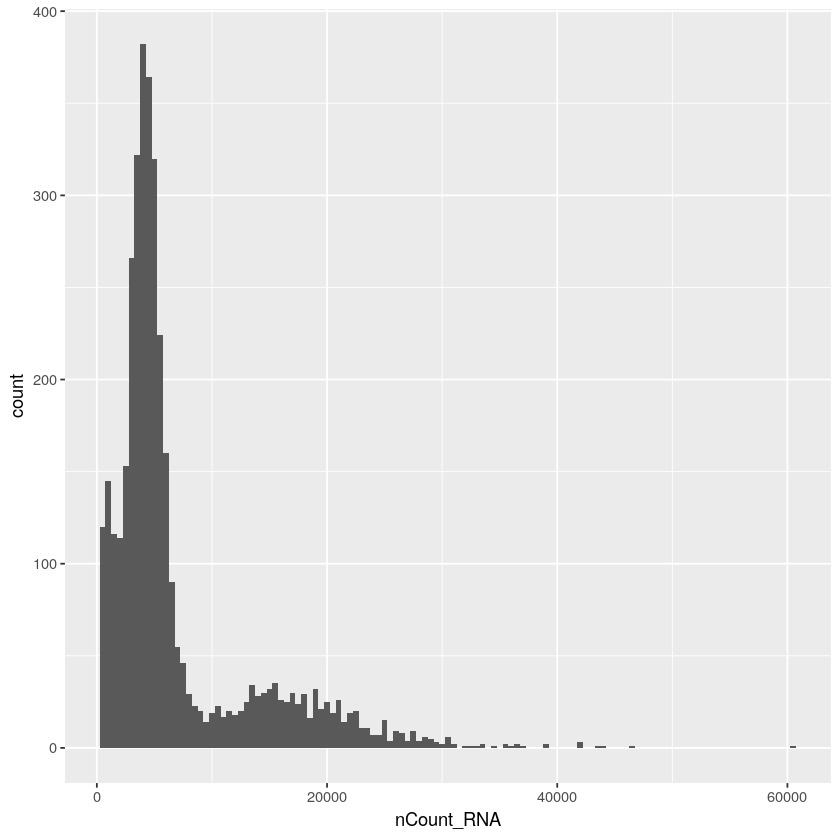

In [21]:
ggplot(s384.s@meta.data, aes(nCount_RNA)) + geom_histogram(binwidth=500)

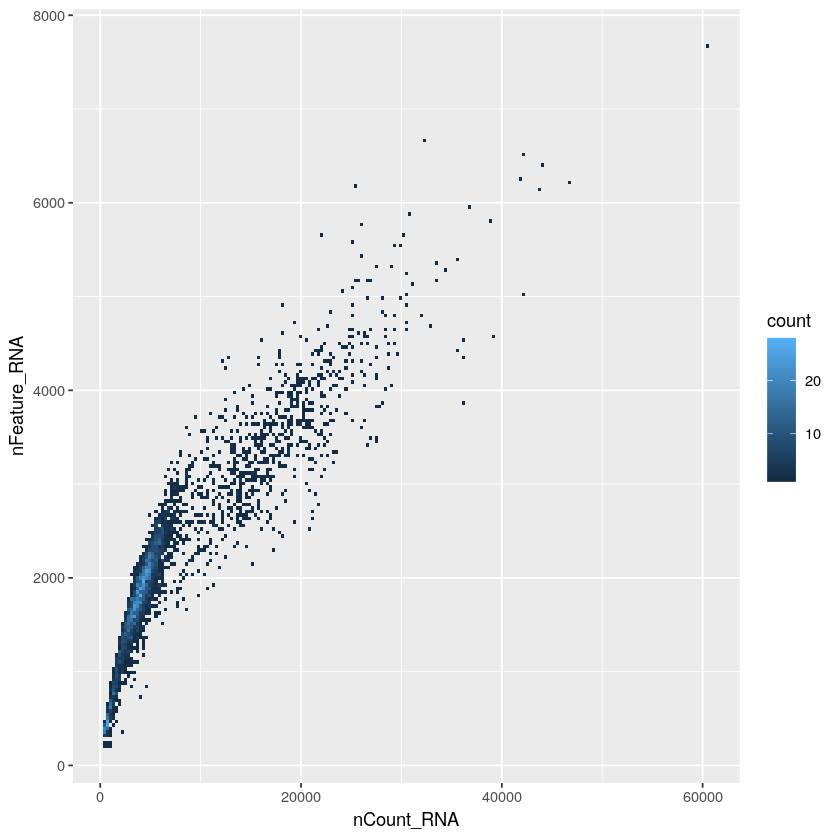

In [28]:
ggplot(s384.s@meta.data, aes(nCount_RNA, nFeature_RNA)) + geom_bin2d(bins=200)

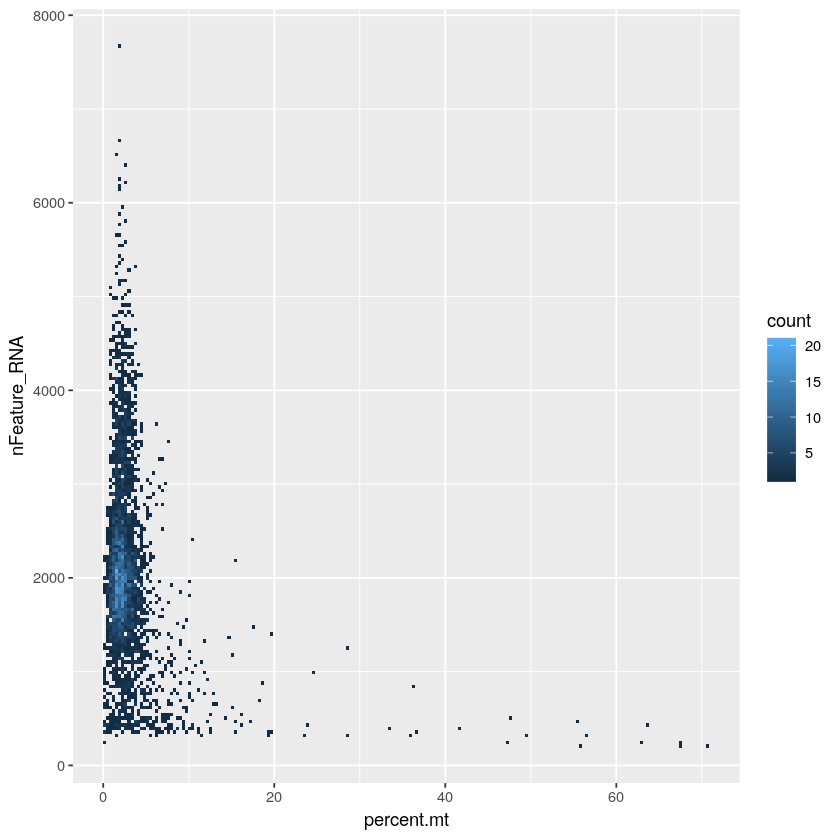

In [29]:
ggplot(s384.s@meta.data, aes(percent.mt, nFeature_RNA)) + geom_bin2d(bins=200)

In [38]:
nFeature.max <- 3000
nFeature.min <- 1000
percent.mt.max <- 7
s384.sub <- subset(s384.s, subset = nFeature_RNA < nFeature.max & nFeature_RNA > nFeature.min & percent.mt < percent.mt.max)

In [39]:
s384.sub <- s384.sub %>% NormalizeData(normalization.method = "LogNormalize", scale.factor = 10000)

Normalizing layer: counts



In [40]:
s384.sub <- FindVariableFeatures(s384.sub, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts



[1] "IL1B"     "CXCL5"    "SERPINB2" "CXCL3"    "CCL22"    "CXCL8"   
 [7] "CXCL1"    "CCL3"     "CXCL2"    "HLA-DRB1"

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


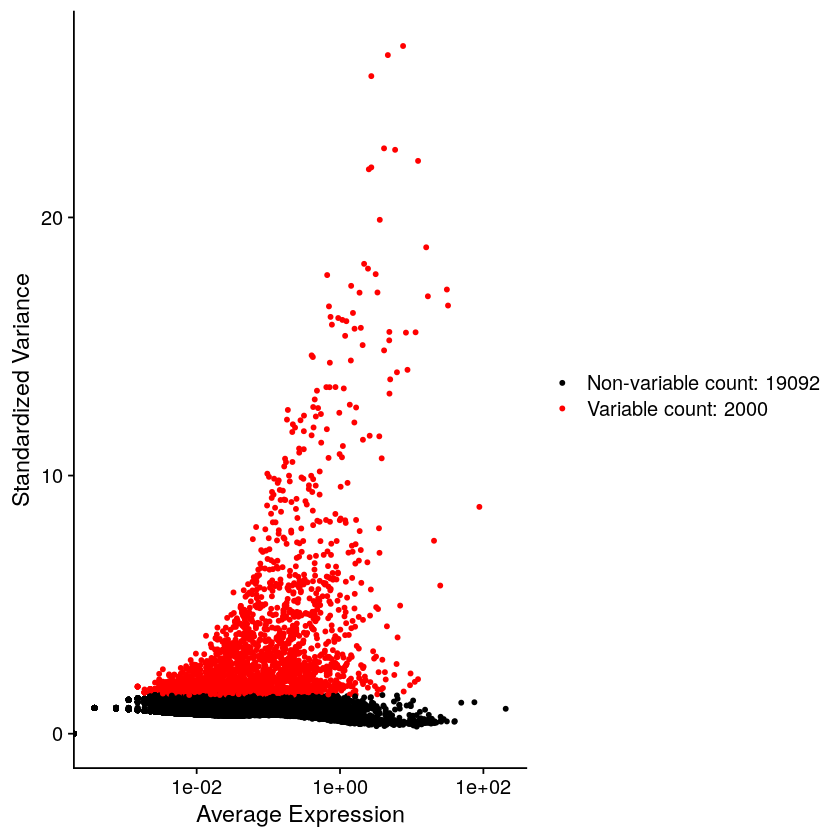

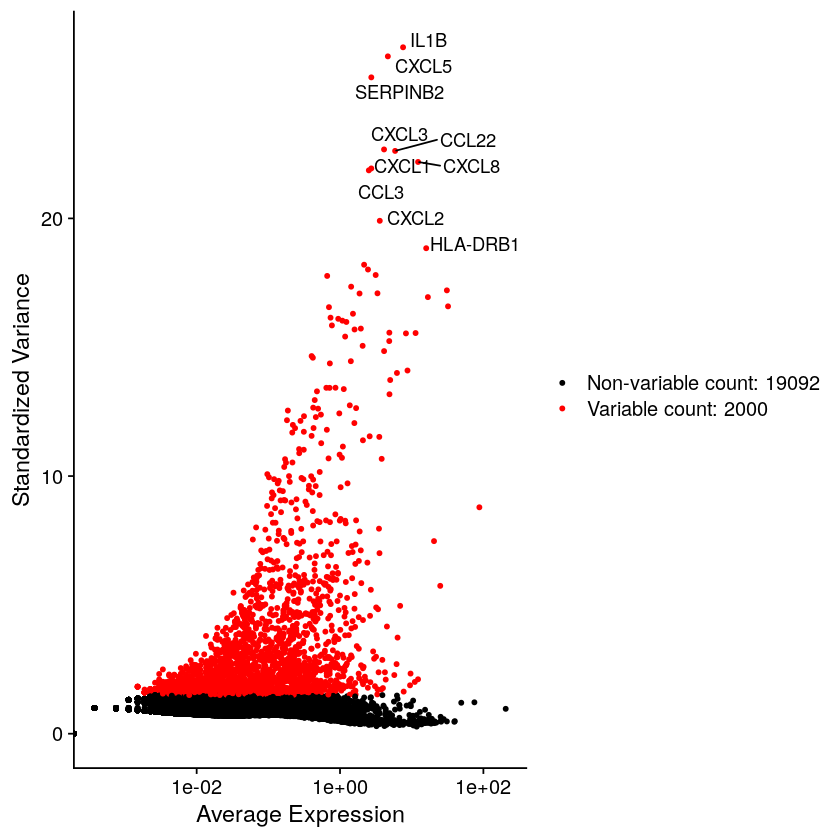

In [41]:
(top10 <- head(VariableFeatures(s384.sub), 10))

plot1 <- VariableFeaturePlot(s384.sub)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1
plot2

In [42]:
all.genes <- rownames(s384.sub)
s384.sub <- s384.sub %>% ScaleData(features = all.genes)

Centering and scaling data matrix



In [43]:
s384.sub <- s384.sub %>% RunPCA(features = VariableFeatures(s384.sub))

PC_ 1 
Positive:  LTB, NPM1, CRIP1, CD69, TIGIT, AOAH, LINC00861, AQP3, GBP5, AL136456.1 
	   HSPA8, CD8A, CD8B, HSP90AB1, PLAAT4, KLRK1, PASK, HSPE1, TSHZ2, KLF2 
	   KLRB1, SELL, CXCR3, TRBV20-1, RTKN2, DUSP2, PCSK1N, ANK3, ABLIM1, NKG7 
Negative:  KYNU, CSF2RA, C15orf48, SLC7A11, MARCKS, EPB41L3, BASP1, IDO1, HLA-DRA, CRLF2 
	   IFI30, NRP2, CXCL8, CD83, BCL2A1, FAM49A, HLA-DQA1, MMP9, IL4I1, CXCL16 
	   MS4A7, SAT1, LAMP3, GPR157, NECTIN2, TXN, SPI1, DUSP5, IL13RA1, LAD1 
PC_ 2 
Positive:  TNFAIP6, FOSL1, RND3, PRRX1, CCDC80, APOE, CCL2, MMP2, DCN, CFD 
	   IGFBP7, SERPING1, MGP, NNMT, CXCL3, BICC1, IL6, SOD3, CXCL14, CXCL2 
	   EMP1, MAP1B, APOD, MEG3, PLPP3, MAFB, DPT, ABI3BP, PRRX2, CXCL1 
Negative:  CCL22, LAMP3, GPR157, CERS6, DAPP1, HLA-DPB1, HLA-DPA1, CD86, CD74, TVP23A 
	   LAD1, HLA-DQA1, IDO1, HLA-DQB1, FSCN1, HLA-DOB, SYNGR2, HLA-DRB1, LSP1, TTYH2 
	   CCR7, TSPAN33, CST7, ACTB, SLC6A12, FLT3, ALDH2, RAMP1, GPR183, DSG2 
PC_ 3 
Positive:  GSN, CCDC80, APOE, PRRX1, RND3, 

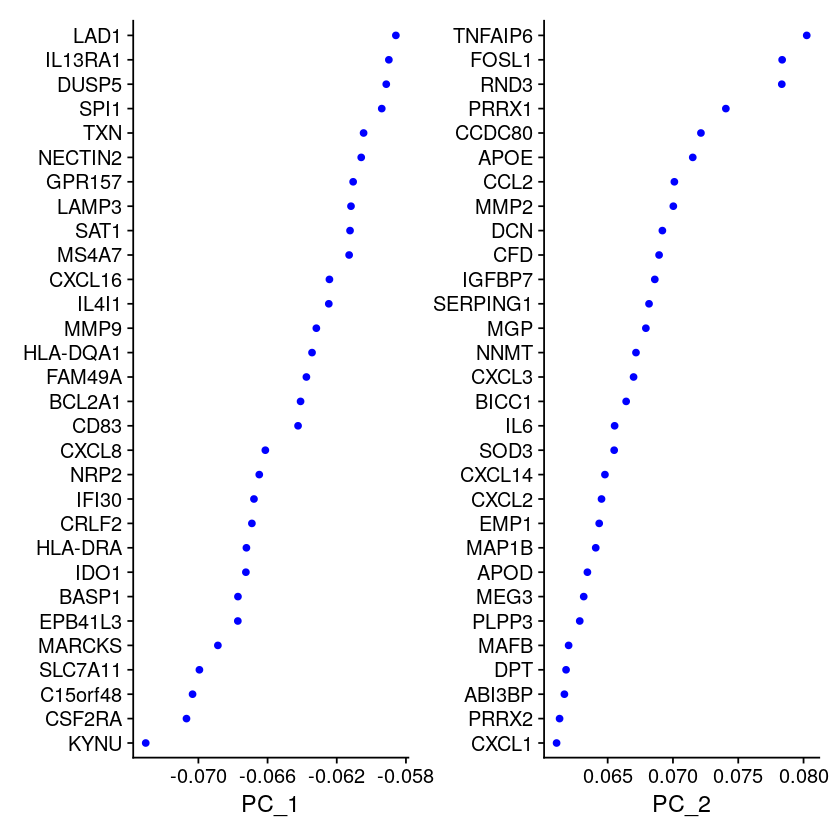

In [44]:
VizDimLoadings(s384.sub, dims = 1:2, reduction = "pca")

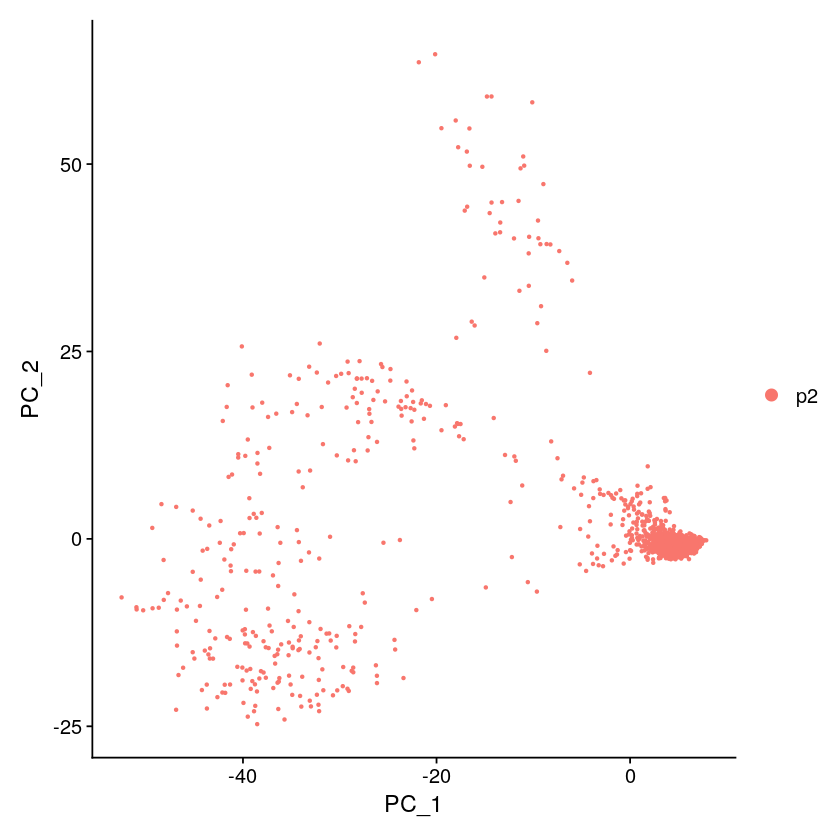

In [46]:
DimPlot(s384.sub, reduction="pca")

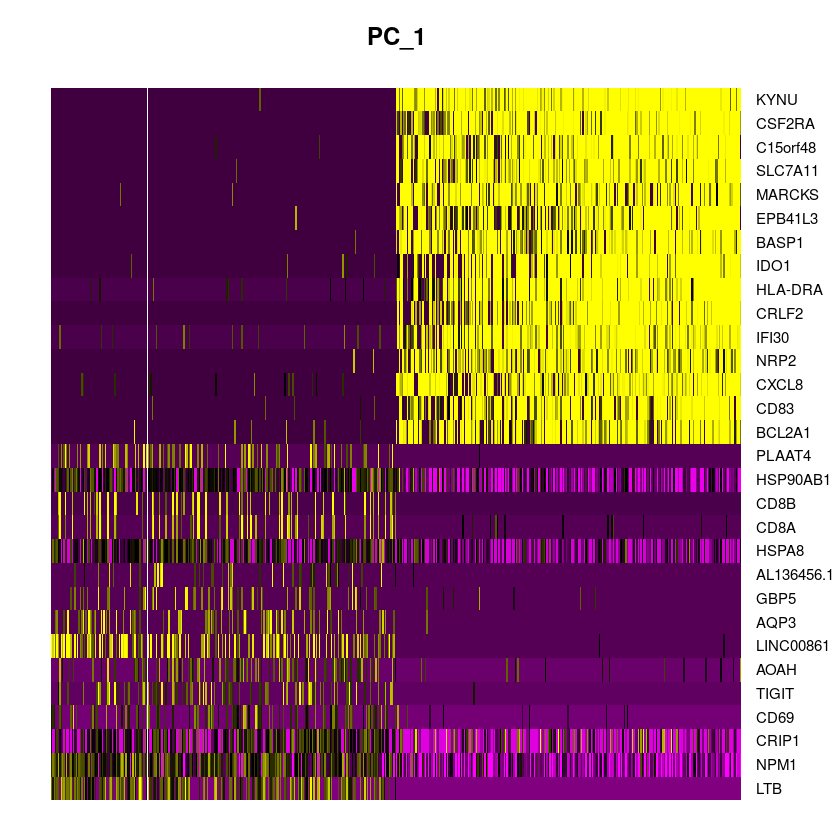

In [49]:
s384.sub %>% DimHeatmap(dims = 1, cells = 500, balanced = TRUE)

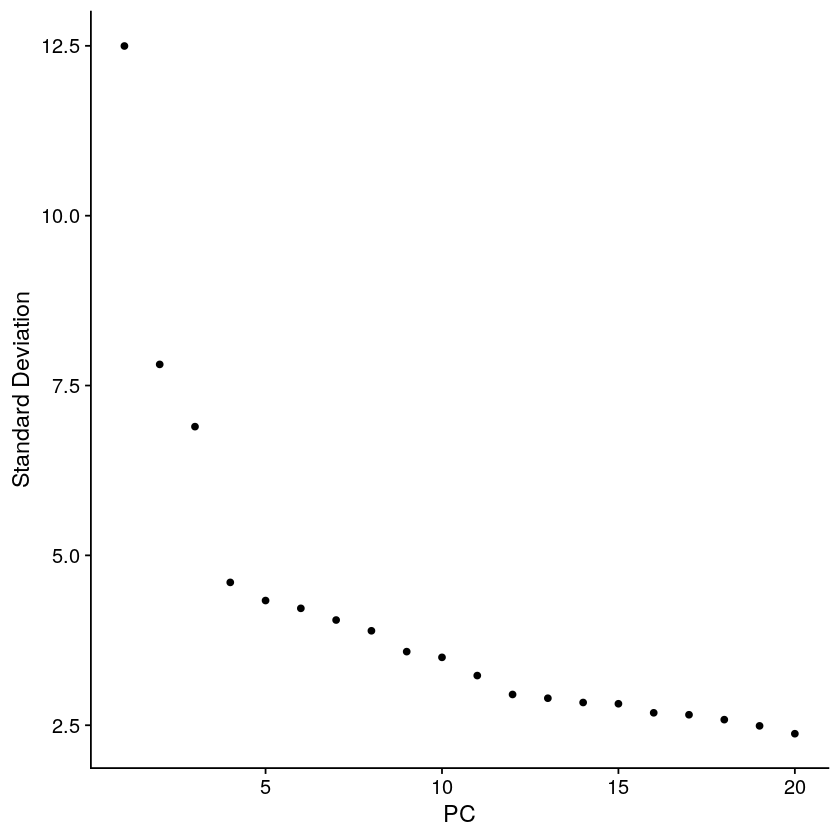

In [50]:
ElbowPlot(s384.sub)

In [54]:
s384.sub <- s384.sub %>% FindNeighbors(dims = 1:10) %>%
 FindClusters(resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2666
Number of edges: 87200

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8462
Number of communities: 12
Elapsed time: 0 seconds


In [55]:
s384.sub <- s384.sub %>% RunUMAP(dims=1:10)

22:24:26 UMAP embedding parameters a = 0.9922 b = 1.112

22:24:26 Read 2666 rows and found 10 numeric columns

22:24:26 Using Annoy for neighbor search, n_neighbors = 30

22:24:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:24:27 Writing NN index file to temp file /tmp/RtmpwNOIVH/file7e6c3bce01

22:24:27 Searching Annoy index using 1 thread, search_k = 3000

22:24:27 Annoy recall = 100%

22:24:28 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

22:24:28 Initializing from normalized Laplacian + noise (using RSpectra)

22:24:28 Commencing optimization for 500 epochs, with 108906 positive edges

22:24:31 Optimization finished



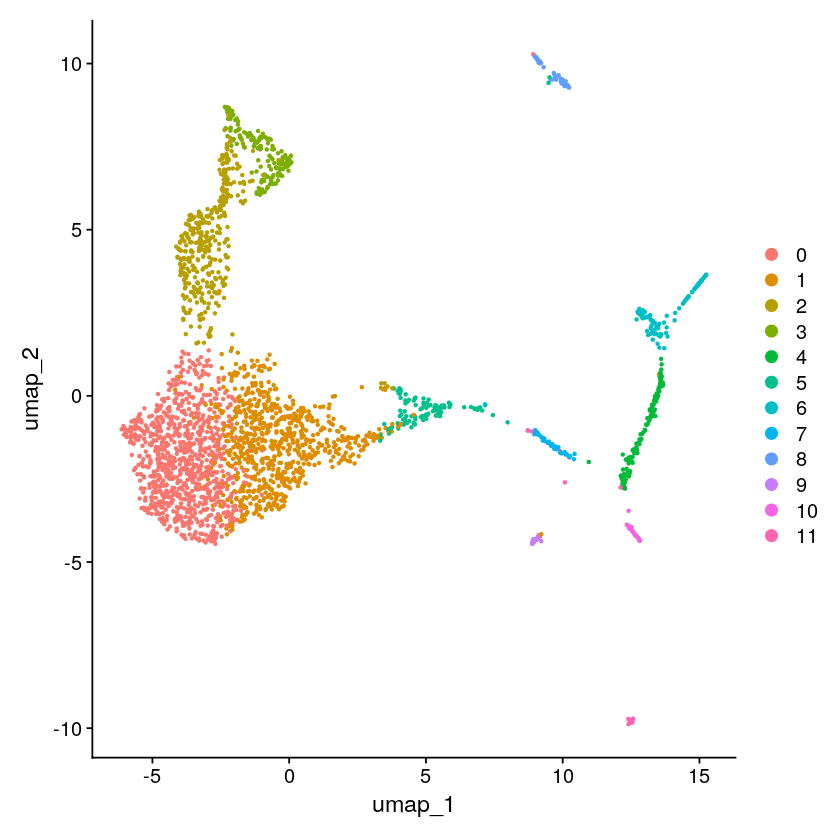

In [56]:
DimPlot(s384.sub, reduction="umap")

In [64]:
names(s384.sub)

[1] "RNA"     "RNA_nn"  "RNA_snn" "pca"     "umap"

In [68]:
typeof(s384.s$percent.mt)

[1] "double"

In [70]:
a <- FindVariableFeatures(s384.sub) %>% VariableFeatures()

Finding variable features for layer counts



In [72]:
length(a)
typeof(a)

[1] 2000

[1] "character"

In [4]:
load.subset <- function(h5, project, nFeature.min, nFeature.max, percent.mt.max, sample) {
    so <- CreateSeuratObject(counts = Read10X_h5(h5), project = project)
    so[["percent.mt"]] <- PercentageFeatureSet(so, pattern = "^MT-")
    orig.cells <- ncol(so$RNA)
    so <- subset(so, subset = nFeature_RNA < nFeature.max & nFeature_RNA > nFeature.min & percent.mt < percent.mt.max)
    return(list(seurat=so, orig.cells = orig.cells, kept.cells = ncol(so$RNA), percent.kept = ncol(so$RNA) / orig.cells))
}

In [5]:
samples.md <- read.table("samples-cutoffs.tsv", row.names=NULL, header=TRUE)

In [6]:
so <- load.subset(samples.md[1,"H5"], samples.md[1,"Case"], samples.md[1,"nFeature.min"], samples.md[1,"nFeature.max"],
                  samples.md[1,"percent.mt.max"])

In [7]:
names(so)

[1] "seurat"       "orig.cells"   "kept.cells"   "percent.kept"

In [8]:
so$percent.kept

[1] 0.8358491

In [12]:
library(dplyr)
sp4.md <- filter(samples.md, Case=="SPIRT4")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [30]:
load.mergeset <- function(md) {
    subsets <- mapply(FUN=load.subset,
                      sample = md$Sample,
                      h5 = md$H5, 
                      project = md$Sample, 
                      nFeature.min = md$nFeature.min, 
                      nFeature.max = md$nFeature.max,
                      percent.mt = md$percent.mt.max,
                     SIMPLIFY=FALSE)
    seurats <- sapply(subsets, '[[', 'seurat')
    subset.df <- data.frame(
        Sample = md$Sample, 
        percent.kept = sapply(subsets, '[[', "percent.kept"),
        orig.cells = sapply(subsets, '[[', "orig.cells"),
        kept.cells = sapply(subsets, '[[', "kept.cells")
    )
    
    genes.intersection <- rownames(seurats[[1]])
    for (i in 2:length(seurats)) {
        genes.intersection <- intersect(genes.intersection, rownames(seurats[[i]]))
    }

    seurat <- merge(seurats[[1]], y = seurats[-1], add.cell.ids = md$Sample, project = md$Case[1])
    seurat <- seurat[genes.intersection,]

    # Very important to subset to [["RNA"]] in the right side here, or it consumes all RAM
    # https://github.com/satijalab/seurat/issues/8208
    seurat[["RNA"]] <- JoinLayers(seurat[["RNA"]])

    seurat <- NormalizeData(seurat)

    VariableFeatures(seurat) <- split(row.names(seurat@meta.data), seurat@meta.data$orig.ident) %>% lapply(function(cells_use) {
        seurat[,cells_use] %>%
            FindVariableFeatures(selection.method = "vst", nfeatures = 2000) %>% 
            VariableFeatures()
    }) %>% unlist %>% unique

    seurat <- seurat %>% 
        ScaleData(verbose = FALSE) %>% 
        RunPCA(features = VariableFeatures(seurat), npcs = 20, verbose = FALSE)
    
    return(list(
        seurat=seurat, 
        df=subset.df
    ))
}

In [54]:
sos <- load.mergeset(sp4.md)
seurat <- sos$seurat
seurat

Normalizing layer: counts

Finding variable features for layer counts

Finding variable features for layer counts

Finding variable features for layer counts

Finding variable features for layer counts



An object of class Seurat 
18082 features across 3442 samples within 1 assay 
Active assay: RNA (18082 features, 4791 variable features)
 3 layers present: counts, data, scale.data
 1 dimensional reduction calculated: pca

19:13:35 UMAP embedding parameters a = 0.9922 b = 1.112

19:13:35 Read 3442 rows and found 20 numeric columns

19:13:35 Using Annoy for neighbor search, n_neighbors = 30

19:13:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:13:35 Writing NN index file to temp file /tmp/RtmpSUPQfJ/file81640536f8

19:13:35 Searching Annoy index using 1 thread, search_k = 3000

19:13:36 Annoy recall = 100%

19:13:36 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:13:37 Initializing from normalized Laplacian + noise (using RSpectra)

19:13:37 Commencing optimization for 500 epochs, with 137910 positive edges

19:13:41 Optimization finished



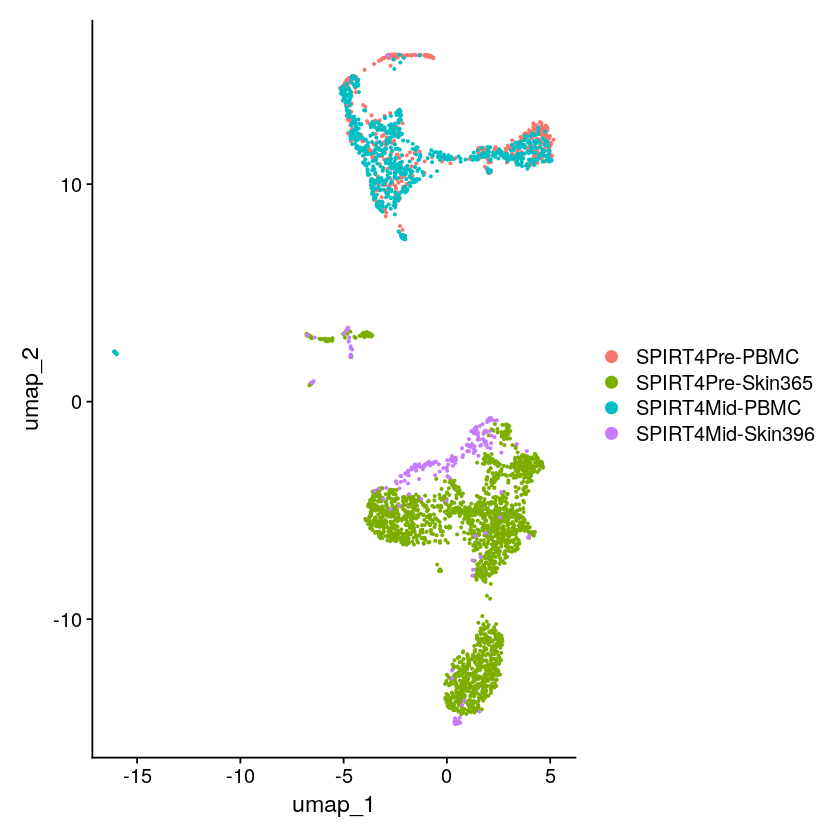

In [57]:
seurat <- seurat %>% 
    RunUMAP(reduction = "pca", dims=1:20)
DimPlot(seurat, reduction="umap")

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations

19:14:05 UMAP embedding parameters a = 0.9922 b = 1.112

19:14:05 Read 3442 rows and found 20 numeric columns

19:14:05 Using Annoy for neighbor search, n_neighbors = 30

19:14:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:14:05 Writing NN index file to temp file /tmp/RtmpSUPQfJ/file81655fb99cf

19:14:05 Searching Annoy index using 1 thread, search_k = 3000

19:14:06 Annoy recall = 100%

19:14:06 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:14:07 Initializing from normalized Laplacian + noise (using RSpectra)

19:14:07 Commencing optimizati

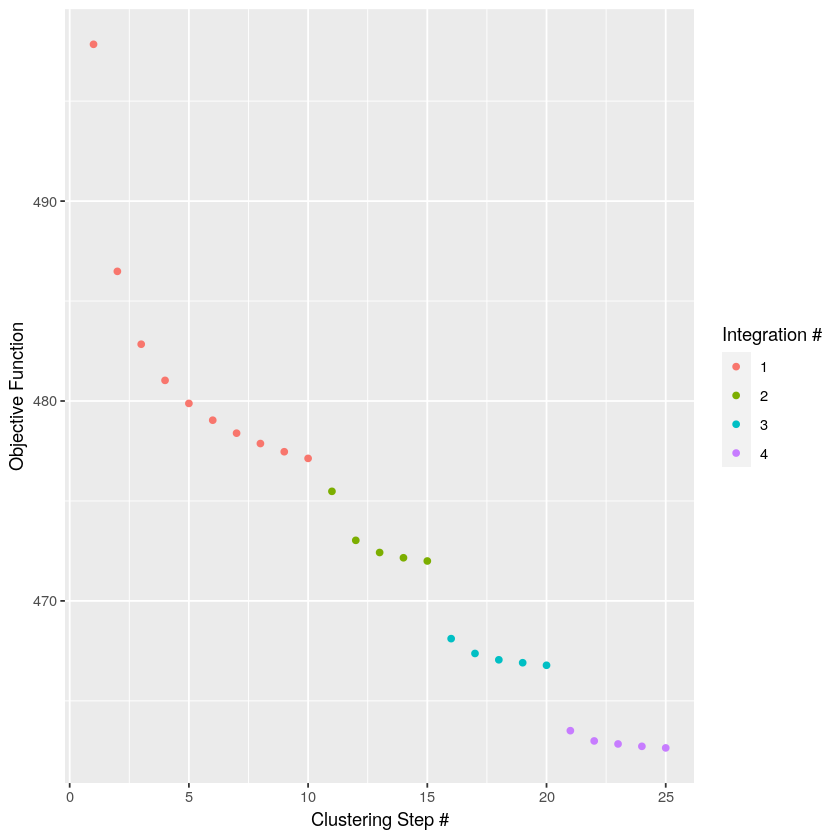

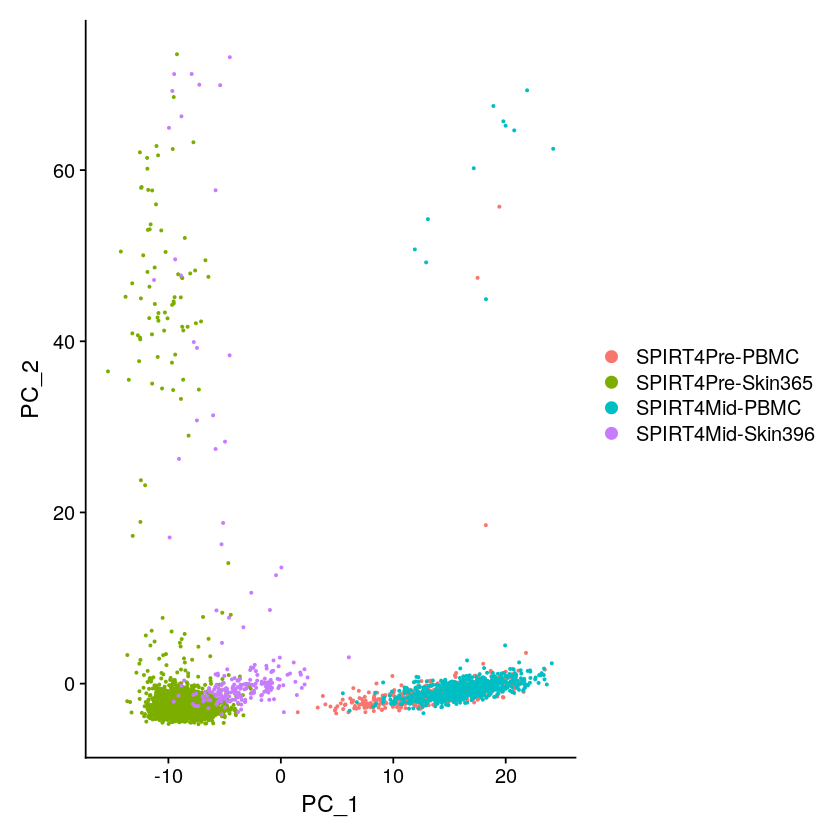

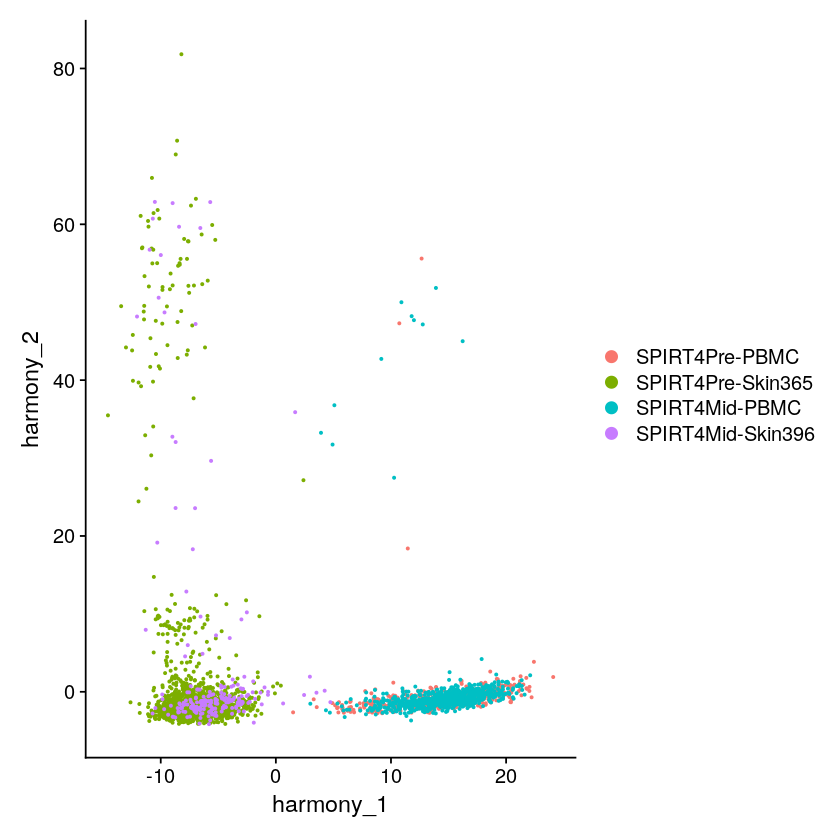

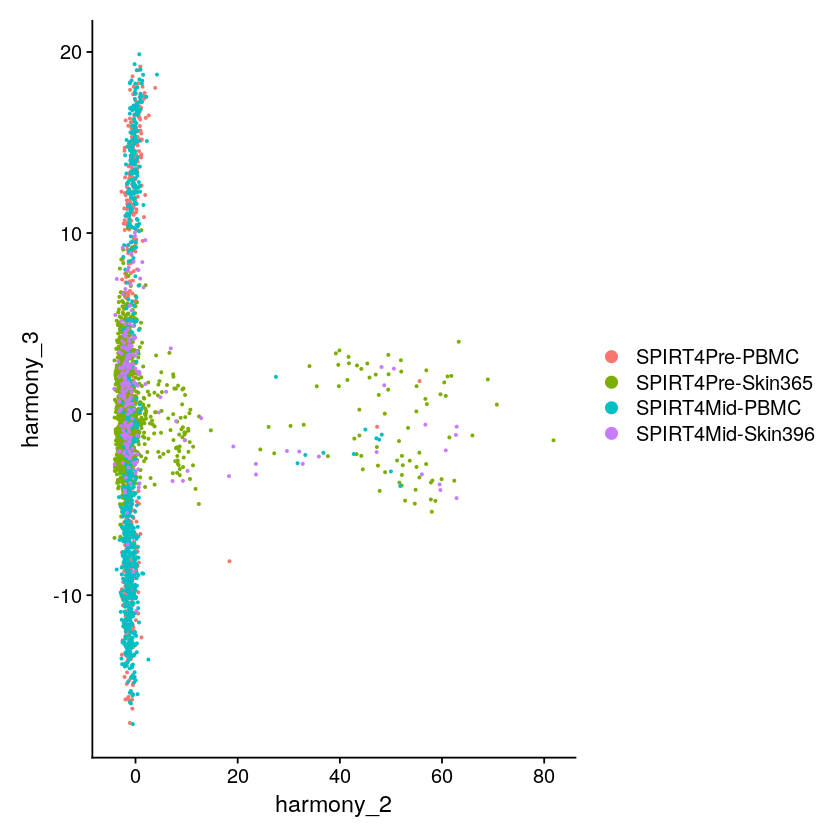

In [59]:
seurat <- seurat %>% RunHarmony(group.by.vars = "orig.ident", plot_convergence = TRUE) %>%
    RunUMAP(reduction="harmony", dims=1:20)
DimPlot(seurat, reduction="pca")
DimPlot(seurat, reduction="harmony")
DimPlot(seurat, reduction="harmony", dims=2:3)


19:35:28 UMAP embedding parameters a = 0.9922 b = 1.112

19:35:28 Read 3442 rows and found 19 numeric columns

19:35:28 Using Annoy for neighbor search, n_neighbors = 30

19:35:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:35:28 Writing NN index file to temp file /tmp/RtmpSUPQfJ/file8166e3f194d

19:35:28 Searching Annoy index using 1 thread, search_k = 3000

19:35:29 Annoy recall = 100%

19:35:29 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:35:30 Initializing from normalized Laplacian + noise (using RSpectra)

19:35:30 Commencing optimization for 500 epochs, with 137438 positive edges

19:35:34 Optimization finished



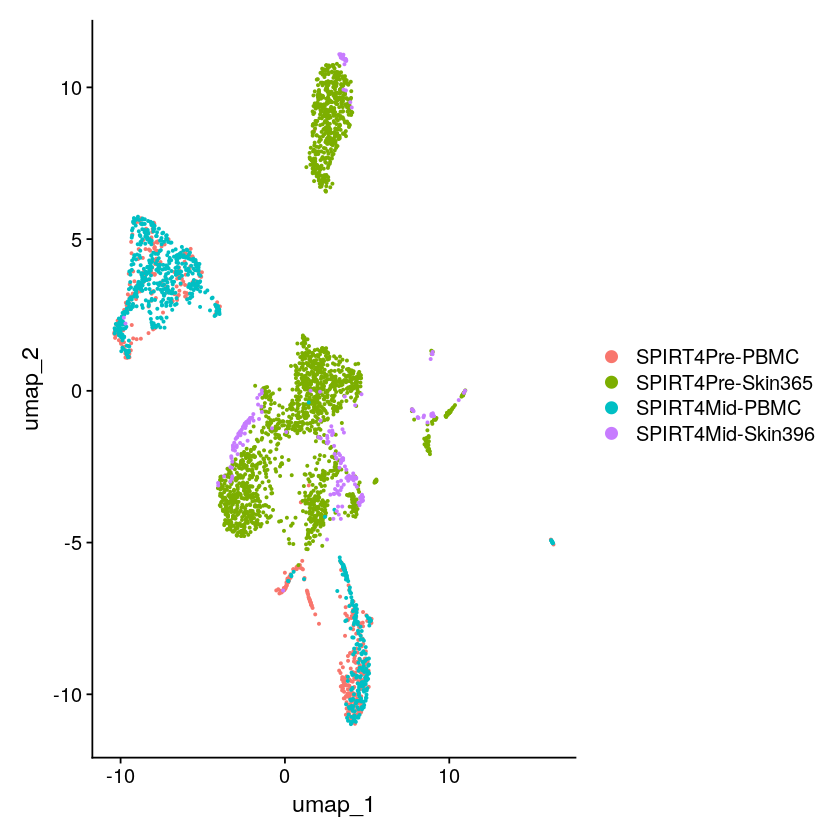

In [65]:
seurat <- seurat %>% RunUMAP(reduction="pca", dims=2:20)
DimPlot(seurat, reduction="umap")

In [56]:
seurat

An object of class Seurat 
18082 features across 3442 samples within 1 assay 
Active assay: RNA (18082 features, 4791 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, umap, harmony

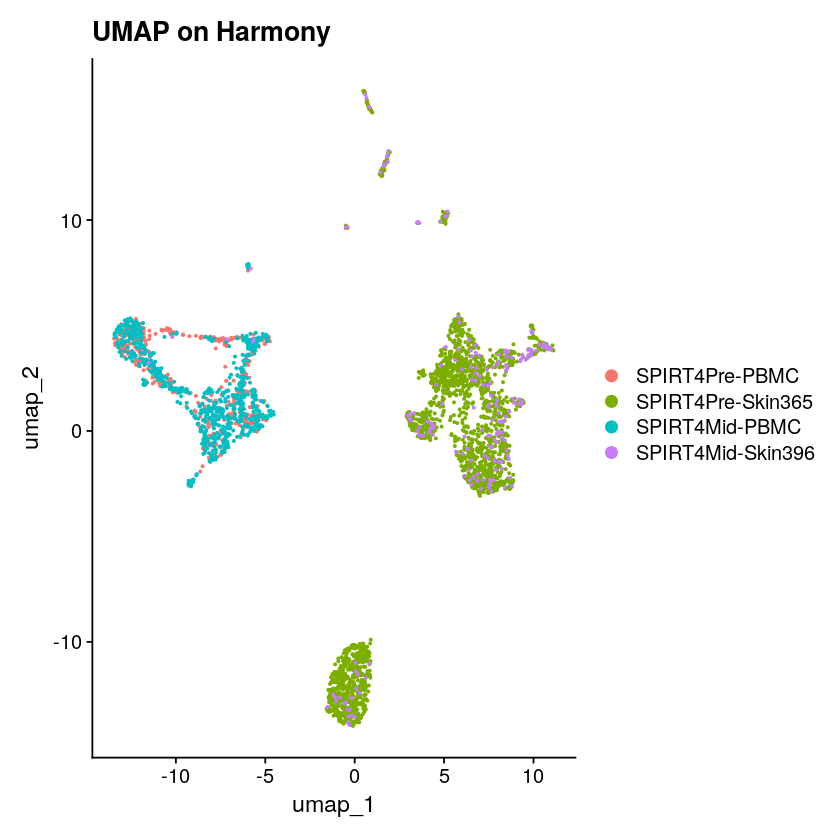

In [61]:
DimPlot(seurat, reduction="umap") + labs(title="UMAP on Harmony")

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations



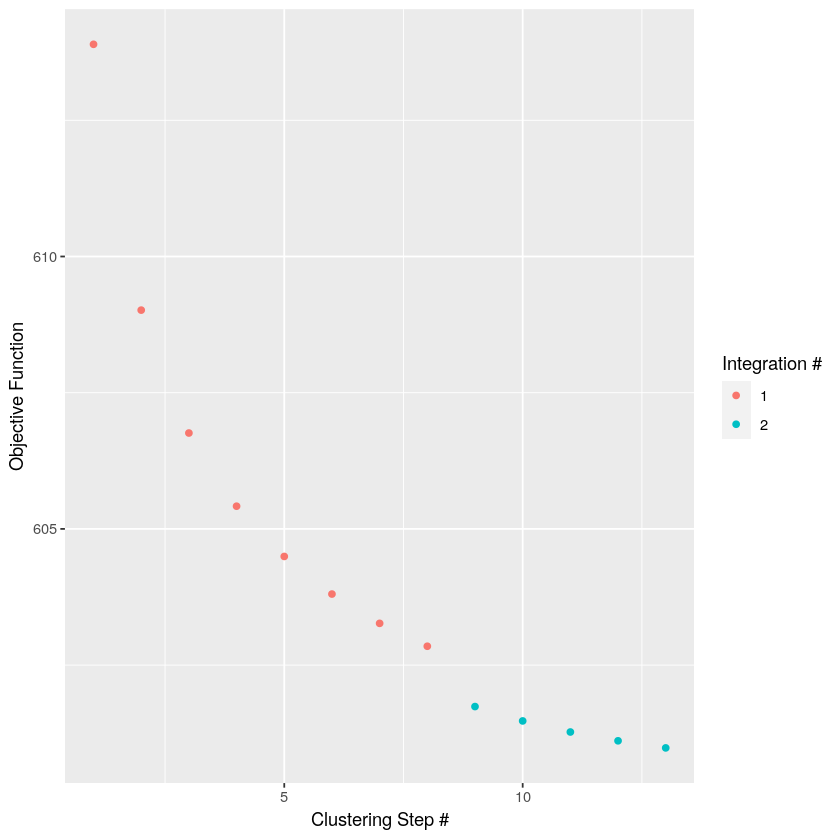

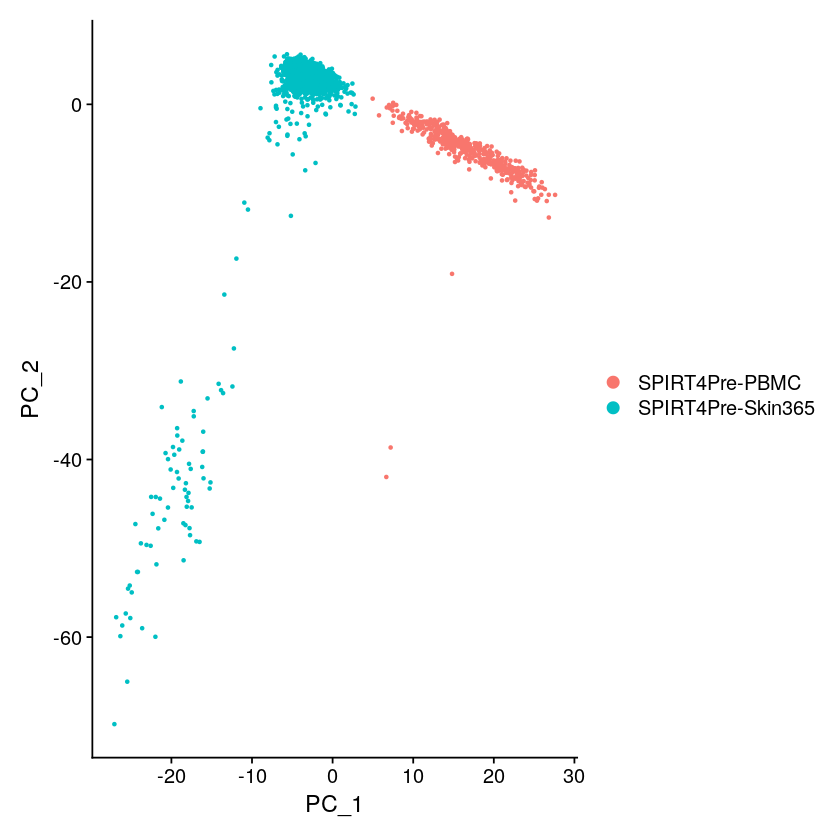

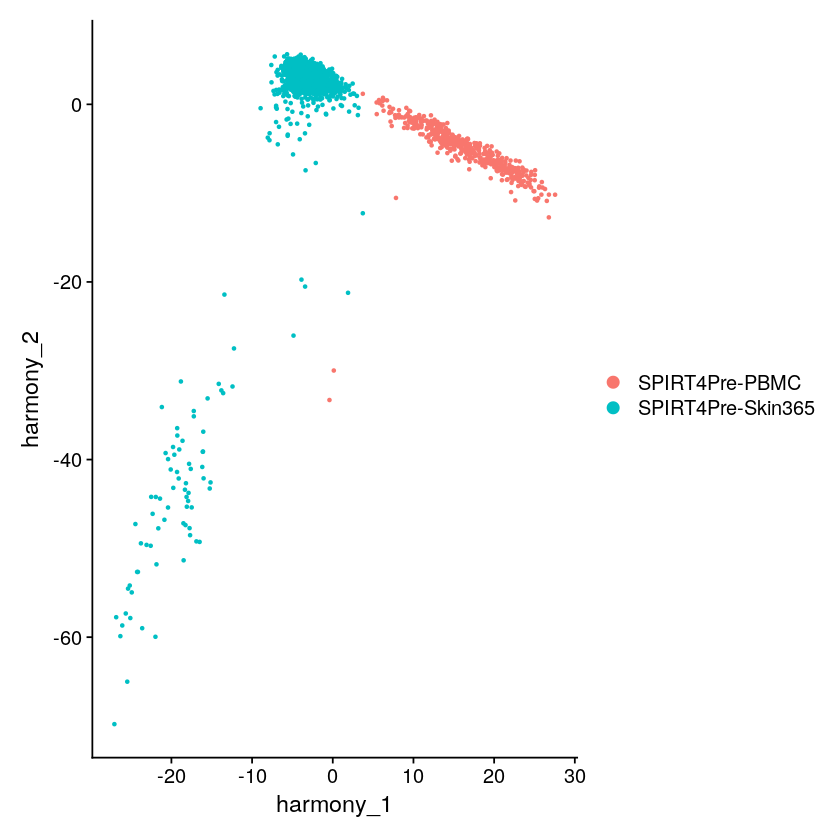

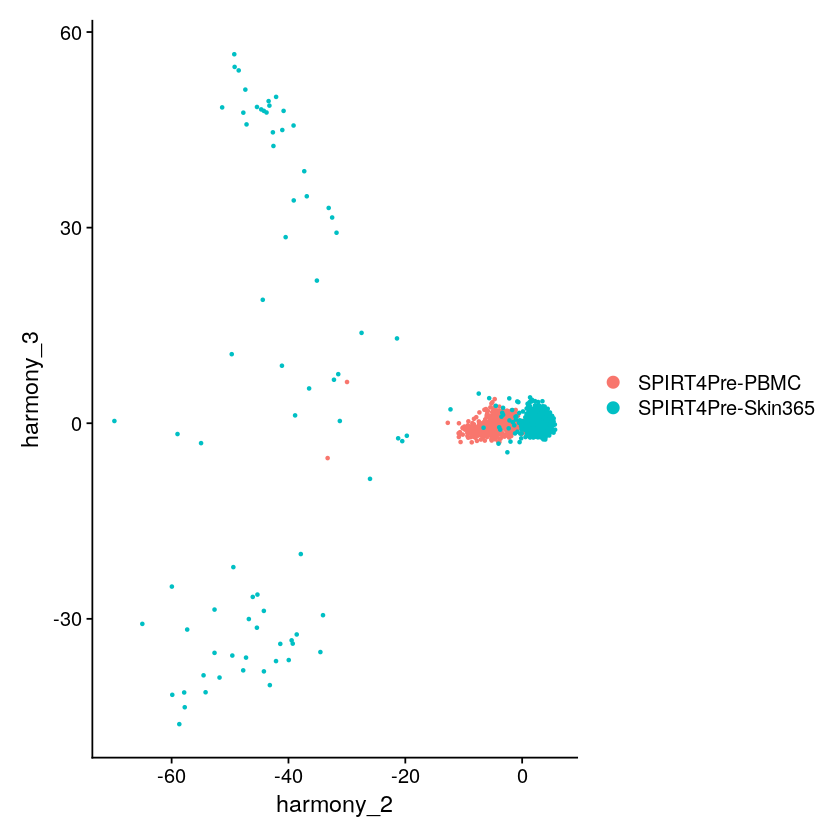

In [42]:
seurat <- seurat %>% RunHarmony(group.by.vars = "orig.ident", plot_convergence = TRUE)

DimPlot(seurat, reduction="pca")
DimPlot(seurat, reduction="harmony")
DimPlot(seurat, reduction="harmony", dims=2:3)


In [45]:
tail(colnames(seurat[["RNA"]]))

[1] "SPIRT4Pre-Skin365_TTTGGTTAGGATGGTC-1"
[2] "SPIRT4Pre-Skin365_TTTGGTTGTAACGTTC-1"
[3] "SPIRT4Pre-Skin365_TTTGGTTGTTATGTGC-1"
[4] "SPIRT4Pre-Skin365_TTTGTCAAGTGCTGCC-1"
[5] "SPIRT4Pre-Skin365_TTTGTCAGTCGCGAAA-1"
[6] "SPIRT4Pre-Skin365_TTTGTCAGTGACTACT-1"

In [62]:
write_tsv

ERROR: Error in eval(expr, envir, enclos): object 'write_tsv' not found


In [63]:
library(readr)

ERROR: Error in library(readr): there is no package called ‘readr’


In [66]:
packageVersion('harmony')

[1] ‘1.2.0’